In [1]:
%load_ext tikzmagic
%matplotlib inline

# 회귀분석의 소개

## 단변수 회귀분석의 예

서로 상관관계가 있는 두가지 데이터가 있으면 한가지 데이터의 값으로부터 다른 하나의 데이터 값을 대략적이나마 유추할 수 있다. 예를 들어 팁데이터에서 총 지불금액 total_bill과 팁 금액 tip은 다음과 같이 하나가 증가하면 다른 하나도 증가하는 양의 상관관계가 있다.

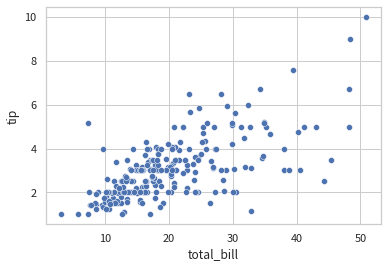

In [2]:
import seaborn as sns

tips = sns.load_dataset("tips")

sns.scatterplot(x="total_bill", y="tip", data=tips)
plt.show()

seaborn 패키지에서 제공하는 `regplot` 함수를 사용하면 total_bill과 tip의 선형 상관관계를 대표하는 직선을 스캐터플롯 위에 표시할 수 있다.

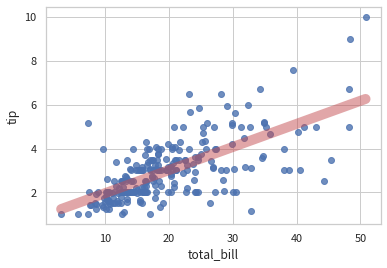

In [3]:
sns.regplot(x="total_bill", y="tip", data=tips, 
            ci=None, line_kws={"color": "r", "lw": 10, "alpha": 0.5})
plt.show()

statsmodels 패키지를 사용하면 이 직선의 방정식을 알아낼 수 있다.

In [4]:
import statsmodels.api as sm

sm.OLS.from_formula("tip ~ total_bill", tips).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     203.4
Date:                Thu, 21 Jul 2022   Prob (F-statistic):           6.69e-34
Time:                        18:16:11   Log-Likelihood:                -350.54
No. Observations:                 244   AIC:                             705.1
Df Residuals:                     242   BIC:                             712.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9203      0.160      5.761      0.000       0.606       1.235
total_bill     0.1050      0.007     14.260      0.000       0.091       0.120
==============================================================================
Omnibus:                       20.185   Durbin-Watson:                   2.151
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.750
Skew:                           0.443   Prob(JB):                     6.35e-09
Kurtosis:                       4.711   Cond. No.                         53.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

위 코드를 작성하는 방법와 결과를 해석하는 방법은 다음 절에서 자세힌 설명한다. 우선은 위 결과로부터 직선의 방정식이 다음과 같다는 것을 알 수 있다.

$$
\text{tip} = 0.1050 \cdot \text{total_bill} + 0.9203
$$

이 방정식은 total_bill을 입력으로 받아 tip을 출력하는 함수의 방정식이므로 total_bill 값으로부터 tip의 대략적인 값을 알아낼 수 있다.
예를 들어 total_bill의 값이 30달러이면 방정식으로부터 tip 금액은 약 4.07달러가 된다.

In [5]:
0.1050 * 30 + 0.9203

4.0703

실제로 total_bill이 30달러 근처(29달러 이상 31달러 이하)인 경우의 데이터를 모아서 보면 다음과 같다.

In [6]:
tip_totalbill30 = tips[(tips.total_bill >= 29) & (tips.total_bill <= 31)].tip
tip_totalbill30

44     5.60
116    5.07
125    4.20
155    5.14
187    2.00
210    2.00
219    3.09
239    5.92
Name: tip, dtype: float64

이 데이터의 평균은 4.13달러다. 우리가 위 방정식으로부터 계산한 값과 유사한 것을 알 수 있다. 

In [7]:
tip_totalbill30.mean()

4.1274999999999995

이렇게 데이터 간의 상관관계를 이용하여 수치형 데이터의 값을 구하는 것을 <b>회귀분석(regression analysis)</b>이라고 한다. 

## 다변수 회귀분석의 예

위에서는 total_bill이라는 하나의 데이터만을 사용하여 tip을 계산하였지만 tip과 상관관계가 있는 다른 데이터가 있다면 그 값도 동시에 사용할 수 있다. 
예를 들어 size와 tip도 서로 약간의 상관관계를 가지고 있다.

In [8]:
from scipy.stats import pearsonr

pearsonr(tips["size"], tips["tip"])

(0.4892987752303571, 4.3005433272249695e-16)

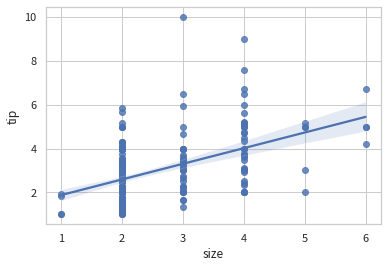

In [9]:
sns.regplot(x="size", y="tip", data=tips)
plt.show()

total_bill과 size 두 가지 값을 모두 입력값으로 하여 tip을 예측하는 방정식을 찾으면 다음과 같다. 

In [10]:
sm.OLS.from_formula("tip ~ total_bill + size", tips).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.468
Model:                            OLS   Adj. R-squared:                  0.463
Method:                 Least Squares   F-statistic:                     105.9
Date:                Thu, 21 Jul 2022   Prob (F-statistic):           9.67e-34
Time:                        18:16:11   Log-Likelihood:                -347.99
No. Observations:                 244   AIC:                             702.0
Df Residuals:                     241   BIC:                             712.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6689      0.194      3.455      0.001       0.288       1.050
total_bill     0.0927      0.009     10.172      0.000       0.075       0.111
size           0.1926      0.085      2.258      0.025       0.025       0.361
==============================================================================
Omnibus:                       24.753   Durbin-Watson:                   2.100
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               46.169
Skew:                           0.545   Prob(JB):                     9.43e-11
Kurtosis:                       4.831   Cond. No.                         67.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

위 코드에 대해서도 다음 절에서 설명한다. 일단은 위 결과로부터 우리가 원하는 방정식은 다음과 같다는 것을 알 수 있다.

$$
\;\;\;\text{tip} = 0.0927 \cdot \text{total_bill} + 0.1926 \cdot \text{size} + 0.6689\;\;\;
$$

이 방정식을 이용하여 size=4, total_bill=30 인 경우 즉, 4인 고객이 30달러를 지불하는 경우의 팁을 계산하면 4.22달러다.

In [11]:
0.0927 * 30 + 0.1926 * 4 + 0.6689

4.2203

실제로 해당 경우의 데이터를 구하면 다음과 같다. 

In [12]:
idx = (tips.total_bill >= 29) & (tips.total_bill <= 31) & (tips["size"] == 4)
tip_totalbill30size4 = tips[idx].tip
tip_totalbill30size4

44     5.60
116    5.07
219    3.09
Name: tip, dtype: float64

평균값은 4.59달러로 우리가 계산한 4.22달러와 비슷하다.

In [13]:
tip_totalbill30size4.mean()

4.586666666666667

이와 같이 복수의 데이터 값으로부터 다른 수치형 데이터의 값을 구하는 것을 <b>다변수 회귀분석(multivariate regression analysis)</b>이라고 한다. 

## 독립변수와 종속변수

회귀분석을 하려면 우선 우리가 값을 구하려는 수치형 데이터와 그 데이터를 계산하기 위해 사용하는 데이터들이 무엇인지를 결정해야 한다. 회귀분석에서 분석의 대상이 되는 수치형 변수를 <b>종속변수(independent variable)</b>라 하고 그 종속변수에 영향을 주는 다른 변수들을 <b>독립변수(dependent variable)</b>라 한다. 보통 종속변수는 $y$ 기호로 나타내고 독립변수는 $x$ 기호로 나타낸다. 독립변수가 여러개 있을 때는 $x_1, x_2, \ldots, x_K$ 등으로 아랫첨자를 이용하여 표시한다.

위에서 보인 첫번째 회귀분석 예에서는 독립변수와 종속변수가 다음과 같았다.

* 독립변수 
  * $x_1$ : total_bill
* 종속변수
  * $y$ : tip
  
두번째 회귀분석 예의 독립변수와 종속변수는 다음과 같았다.

* 독립변수 
  * $x_1$ : total_bill
  * $x_2$ : size
* 종속변수
  * $y$ : tip
  
